데이터분석 미션
- 과제1 : 서울시 구별 경찰서수와 CCTV설치수 조사
- 과제2 : 경찰서관할별 CCTV (설치대수) 조사
- 과제3 : 과제1,2를 하나의 그래프로 나타내보자.
- 과제4 : 경찰서수가 가장 많은구, CCTV가 가장 많이 설치된구를 파이차트로 나타내보자
- 과제5 : 모든 그래프를 1Page Report로 나타내보자

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [2]:
df= pd.read_csv('data/public_seoul_cctv_2017.csv', encoding='EUC-KR')

In [3]:
df

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,"1,131"
4,혜화,215,481
5,용산,632,"1,897"
6,성북,453,"1,276"
7,동대문,486,"1,396"
8,마포,703,952
9,영등포,745,"1,122"


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경찰서     32 non-null     object
 1   개소      32 non-null     object
 2   대수      32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes
None


In [5]:
df.set_index('경찰서', inplace=True)
df.tail()

,개소,대수
경찰서,,
방배,236,830
은평,339,"1,058"
도봉,472,485
수서,677,"1,856"
총계,"16,603","33,523"


In [6]:
df = df.drop(df.index[-1])
df.tail(10)

,개소,대수
경찰서,,
종암,295,767
구로,695,"1,691"
서초,344,"1,079"
양천,763,"2,234"
송파,675,779
노원,"1,288","1,416"
방배,236,830
은평,339,"1,058"
도봉,472,485


In [7]:
# , 삭제
for n in np.arange(len(df)):
    df['개소'].values[n] = int(df['개소'].values[n].replace(',', ''))
    df['대수'].values[n] = int(df['대수'].values[n].replace(',', ''))

In [8]:
df.head(10)

,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,1131
혜화,215,481
용산,632,1897
성북,453,1276
동대문,486,1396
마포,703,952


In [9]:
#내림차순 정렬
df_sort = df.sort_values("대수", ascending=False)
df_sort.head(10)

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804
구로,695,1691
강남,596,1612
노원,1288,1416
동대문,486,1396
성북,453,1276


#### 데이터 시각화

#### 서울시 구별 경찰서수와 CCTV설치수 조사

In [12]:
import seaborn as sns
sns.set()

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

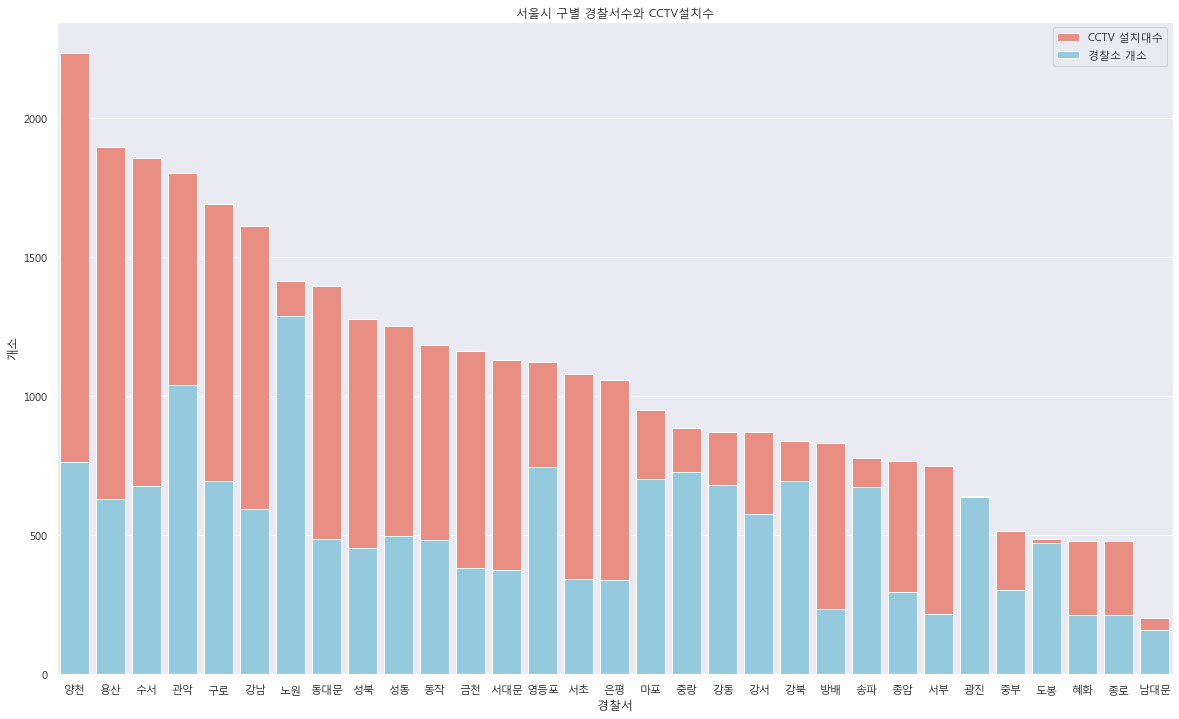

In [14]:
plt.figure(figsize=(20,12))
sns.barplot(x=df_sort.index, y=df_sort['대수'], color='salmon', label='CCTV 설치대수')
sns.barplot(x=df_sort.index, y=df_sort['개소'], color='skyblue', label='경찰소 개소')

plt.legend()
plt.title('서울시 구별 경찰서수와 CCTV설치수')
plt.show()

#### 경찰서관할별 CCTV (설치대수) 조사
Q. explode 적용이 안됨 + 글자랑 그래프가 못생김..

In [17]:
df_cctv = df['대수']

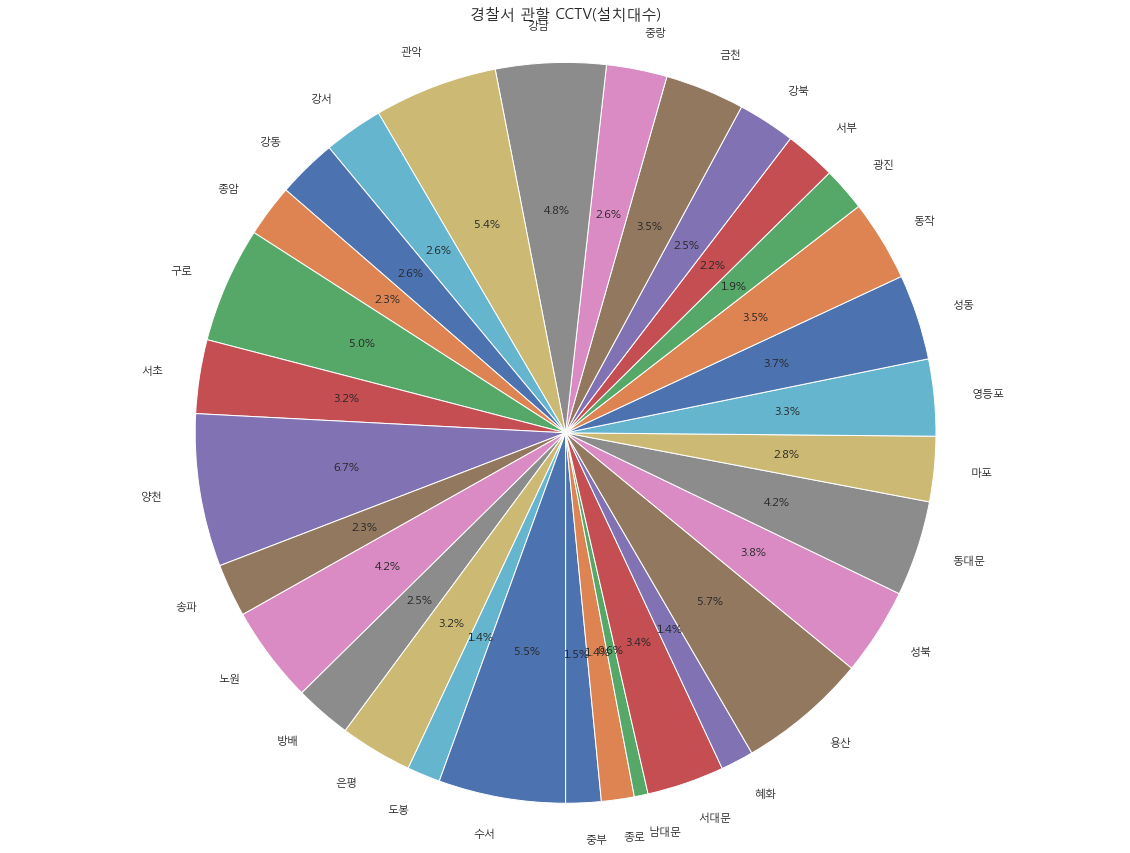

In [41]:
plt.figure(figsize=(20,15))

plt.pie(df_cctv, labels=df_cctv.index, autopct='%.1f%%', 
        shadow=False, startangle=-90)
plt.axis('equal')
plt.title("경찰서 관할 CCTV(설치대수)", fontsize=15)
plt.show()

#### 경찰서수가 가장 많은구, CCTV가 가장 많이 설치된구를 파이차트로 나타내기

In [34]:
df_police = df['개소']

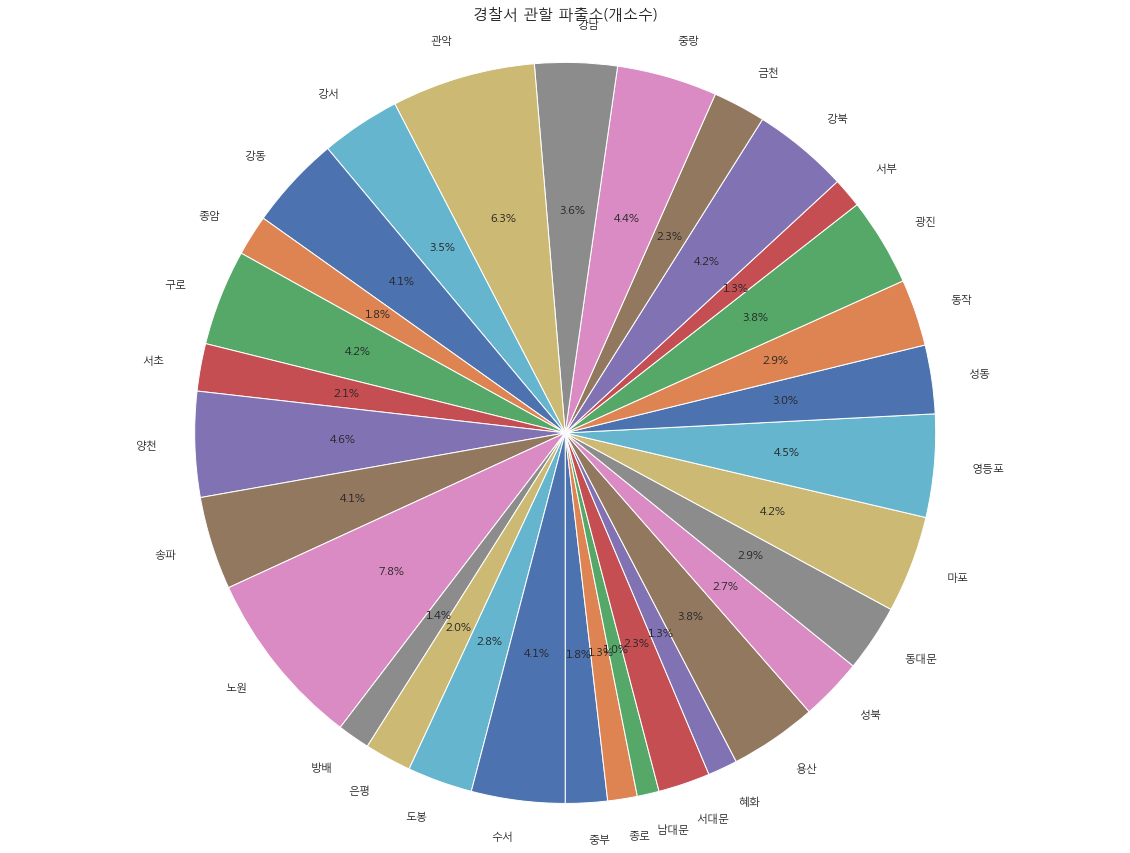

In [37]:
plt.figure(figsize=(20,15))

plt.pie(df_police, labels=df_police.index, autopct='%.1f%%', 
        shadow=False, startangle=270)
plt.axis('equal')
plt.title("경찰서 관할 파출소(개소수)", fontsize=15)
plt.show()

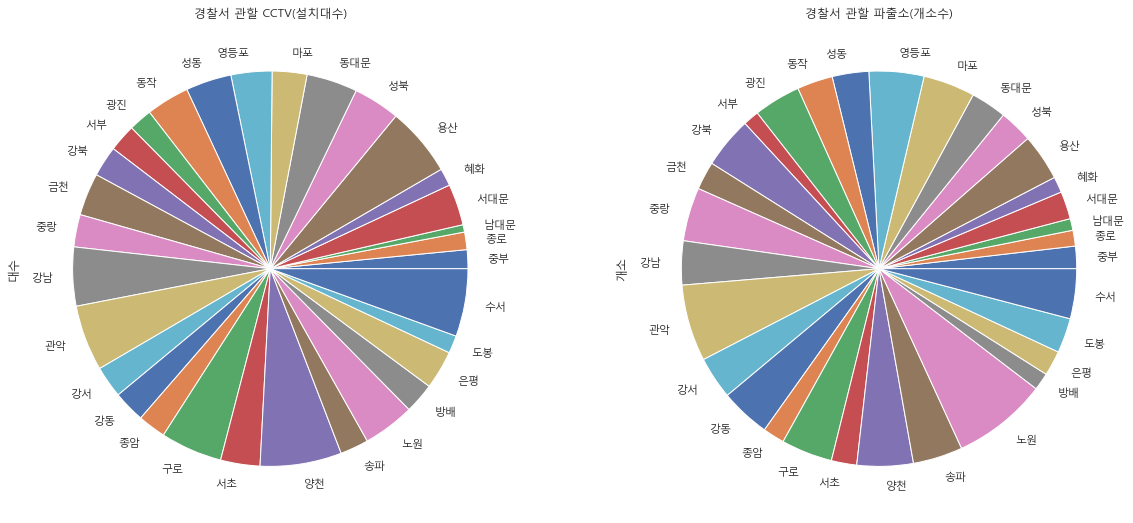

In [48]:
plt.figure(figsize=(20,20))

# plt.subplot(211) 
# plt.title("서울시 구별 경찰서수와 CCTV설치수")
# df_sort.index(kind='bar')

plt.subplot(223) 
plt.title("경찰서 관할 CCTV(설치대수)")
df_cctv.plot(kind='pie')

plt.subplot(224)
plt.title("경찰서 관할 파출소(개소수)")
df_police.plot(kind='pie')

plt.show()